<img src="image/ai0/Title_Color_Object_Tracking.png" width=1000>

# 색상 인식 기반으로 물체를 추적하기

화면의 어느 한점의 색상을 기준으로해서, 물체를 추적합니다. 추적된 물체는 화면에 표시되며, 좌표를 받아 올수도 있습니다.

<br>

## 1. import  - 모듈 가져오기   
이 셀은 색상 인식 기반으로 물체를 추적하기 위한 구성 요소를 가져옵니다.

In [1]:
from zumi.zumi import Zumi
import time

zumi = Zumi()

from module.object_tracking import ObjectTracking

from zumi.util.camera import Camera
import IPython.display
import PIL.Image
import time

camera = Camera()
objectTracking = ObjectTracking()

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
Compass detected
OLED Screen detected
Gyroscope & Accelerometer detected


<br>

## 2. 색상 등록   
주미의 카메라에 원하는 물체의 색상을 카메라 화면의 가운데로 위치하도록 합니다.

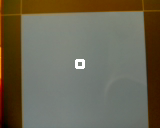

등록이 완료되었습니다.
Closing PiCamera


In [5]:
try:
    camera.start_camera()
    
    time_out = 3 # 입력한 시간 동안 등록
    time_start = time.time()
    time_elapsed = 0
    
    print("원하는 색깔의 물체를 가운데로 위치 시켜주세요.")
    time.sleep(1)
    
    while time_elapsed < time_out:   
        time_elapsed = time.time()-time_start
                
        frame = camera.capture()    # 사진을 촬영합니다.
        frame = objectTracking.register_color(frame)  # 사진의 중심점의 색상을 구합니다.
                
        IPython.display.display(PIL.Image.fromarray(frame))    
        
        print("등록 " + str(time_out - int(time_elapsed)) + " 초 전")
        IPython.display.clear_output(wait=True) 
        
    IPython.display.display(PIL.Image.fromarray(frame))      
    print("등록이 완료되었습니다.") 
                
finally:
    camera.close()

<img src="image/ai0/color_Object_Tracking_01.png" width=500>   

<br>

## 3. 물체 추적
추적된 물체는 화면에 표시되며, 좌표를 받아 올수도 있습니다.

* `인식하려는 장수의 주변 배경에 비슷한 색이 있다면 인식이 어려울 수 있습니다`
* 한번 시작하게 되면 이 셀은 영원히 실행될 것입니다. 이때 두 번째 툴바에서 “Stop”버튼 ■ 을 누른다면 종료할 수 있습니다

In [7]:
try:    
    camera.start_camera()
    
    print("추적을 시작합니다.")     
    time.sleep(1)
    
    while True:
        frame = camera.capture()    # 사진을 촬영합니다.
        
        # 물체의 좌표 추적하기
        frame = objectTracking.color_tracking(frame)  # 등록된 색상과 같은 색의 오브젝트를 추적합니다.
        
        IPython.display.display(PIL.Image.fromarray(frame))   
        
        # 물체의 좌표 가져오기 (감지 되지 않은 경우 -1 반환)
        x, y = objectTracking.object_location()
        print(x,y)
        
        # 물체의 크기 가져오기 (크기 = 가로 x 세로 픽셀, 감지 되지 않은 경우 -1 반환)
        area = objectTracking.object_area()
        print(area)
                       
        IPython.display.clear_output(wait=True)           
        
except :
    pass


finally:
    camera.close()       

Closing PiCamera


<img src="image/ai0/color_Object_Tracking_02.png" width=350>   

<br>

## 4. 물체의 거리에 따라 이동
카메라에 인식된 물체는 거리에 따라서 크기가 다르게 인식됩니다.   
이 크기가 작다면 물체와 멀어졌다고 생각하여 주미가 앞으로 이동하게 됩니다.

* 한번 시작하게 되면 이 셀은 영원히 실행될 것입니다. 이때 두 번째 툴바에서 “Stop”버튼 ■ 을 누른다면 종료할 수 있습니다

In [9]:
try:    
    zumi = Zumi()
    camera.start_camera()
    
    print("추적을 시작합니다.")     
    time.sleep(1)
    
    while True:
        frame = camera.capture()    # 사진을 촬영합니다.
        
        # 물체의 좌표 추적하기
        frame = objectTracking.color_tracking(frame)  # 등록된 색상과 같은 색의 오브젝트를 추적합니다.
        
        IPython.display.display(PIL.Image.fromarray(frame))   
        
        # 물체의 좌표 가져오기 (감지 되지 않은 경우 -1 반환)
        x, y = objectTracking.object_location()
        print(x,y)
        
        # 물체의 크기 가져오기 (감지 되지 않은 경우 -1 반환)
        area = objectTracking.object_area()
        print(area)
        
        #넓이 최소, 최대 값 (주변 환경에 맞게 설정해주기)
        area_min = 200
        area_max = 700
        
        # 색상이 감지되었는지 확인
        if area != -1:
            
            # 색상의 넓이가 일정범위보다 작다면 이동 (색깔과 거리가 멀어지면 이동) 
            if area < area_max: # 넓이가 최대 값보다 작을 때
                
                if area > area_min: # 넓이가 작은 경우는 무시하도록 최소 값보다 클 때
                    print("go")
                    zumi.forward()                
                
        IPython.display.clear_output(wait=True)  
        
except : 
    pass

finally:
    camera.close()
    zumi.stop()
    

Closing PiCamera


<img src="image/ai0/color_Object_Tracking_03.png" width=500>   

<br>

## 5. 물체의 방향으로 회전하기
카메라에 인식된 물체는 화면상에 좌표로 나타낼 수 있습니다.   
화면의 중앙을 기준으로 물체의 좌우 위치에 따라 주미가 회전합니다.

* 한번 시작하게 되면 이 셀은 영원히 실행될 것입니다. 이때 두 번째 툴바에서 “Stop”버튼 ■ 을 누른다면 종료할 수 있습니다

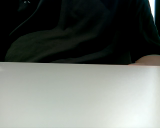

-1 -1
-1
Closing PiCamera


In [11]:
try:    
    zumi = Zumi()    
    camera.start_camera()
    
    print("추적을 시작합니다.")     
    time.sleep(1)
    
    while True:
        frame = camera.capture()    # 사진을 촬영합니다.
        
        # 물체의 좌표 추적하기
        frame = objectTracking.color_tracking(frame)  # 등록된 색상과 같은 색의 오브젝트를 추적합니다.
        
        IPython.display.display(PIL.Image.fromarray(frame))   
        
        # 물체의 좌표 가져오기 (감지 되지 않은 경우 -1 반환)
        # 왼쪽 모서리 기준
        # x = 0 ~ 160
        # y = 0 ~ 128
        x, y = objectTracking.object_location()
        print(x,y)
        
        # 물체의 크기 가져오기 (감지 되지 않은 경우 -1 반환)
        area = objectTracking.object_area()
        print(area)

        # 넓이 최소 값 
        area_min = 200
        
        # 화면의 중심점 구하기 (이미지의 가로와 세로 길이를 절반으로 나누어 구합니다.)
        height, width, channels = frame.shape   
        width = width/2
        height = height/2
        
        # 이미지가 중앙위치에서 + x_offset, - x_offset 위치 내에 표시 
        x_offset = 5  # (x가 75 ~ 85 내에 위치되도록 함)
        
        # 오브젝트의 위치를 따라서 주미가 회전합니다.
        if area != -1:
            
            if area > area_min: # 넓이가 작은 경우는 무시하도록 일정크기이상에서 작동
    
                # 현재 오브젝트의 x 축 위치에 따라 주미의 각도를 조정
                # x가 중앙 점위치보다 작을 때 오른쪽으로 회전
                if  x < width - x_offset : 
                    print("turn right")
                    zumi.turn_right(5)          
                    
                # x가 중앙 점위치보다 클 때 왼쪽으로 회전 
                elif x > width + x_offset:  
                    print("turn left")
                    zumi.turn_left(5)      
                
        IPython.display.clear_output(wait=True)  
        
except : 
    pass

finally:
    camera.close()
    zumi.stop()
    

<img src="image/ai0/color_Object_Tracking_04.png" width=470>   

<br>

## 6. 오브젝트의 위치로 이동하기
인식된 물체의 크기와 X,Y 좌표 위치를 사용하여 물체의 위치로 이동합니다.

* 한번 시작하게 되면 이 셀은 영원히 실행될 것입니다. 이때 두 번째 툴바에서 “Stop”버튼 ■ 을 누른다면 종료할 수 있습니다

In [12]:
try:    
    zumi = Zumi()
    ang_z = zumi.read_z_angle()

    camera.start_camera()
    
    print("추적을 시작합니다.")     
    time.sleep(1)
    
    while True:
        frame = camera.capture()    # 사진을 촬영합니다.
        
        # 물체의 좌표 추적하기
        frame = objectTracking.color_tracking(frame)  # 등록된 색상과 같은 색의 오브젝트를 추적합니다.
        
        IPython.display.display(PIL.Image.fromarray(frame))   
        
        # 물체의 좌표 가져오기 (감지 되지 않은 경우 -1 반환)
        # 왼쪽 모서리 기준
        # x = 0 ~ 160
        # y = 0 ~ 128
        x, y = objectTracking.object_location()
        print(x,y)
        
        # 물체의 크기 가져오기 (감지 되지 않은 경우 -1 반환)
        area = objectTracking.object_area()
        print(area)
        
        # 화면의 중심점 구하기
        height, width, channels = frame.shape   
        width = width/2
        height = height/2
        
        # 이미지가 표시하게될 위치
        # 중앙위치에서 +5, -5 만큼 
        x_offset = 5 
        
        # 넓이 최소 최대 값 
        area_max = 700
        area_min = 200
                        
        # 오브젝트의 위치를 따라서 주미가 회전합니다.
        if area != -1:
                                                         
            if area > area_min: # 넓이가 최소값보다 작은 경우는 무시하도록 일정크기이상에서 작동

                # 현재 오브젝트의 x 축 위치에 따라 주미의 각도를 조정
                               
                # x가 중앙 점위치보다 작을 때 오른쪽으로 회전
                if  x < width - x_offset :                      
                    print("turn right")
                    # 원하는 각도와 현재위치 각도 차이에 따라 회전 각도를 조절합니다.
                    if(width - x_offset - x > 20):  # 각도가 20도 이상 차이가 나는 경우                      
                        zumi.turn_right(5)                    
                    else:
                        zumi.turn_right(2)
                        
                # x가 중앙 점위치보다 클 때 왼쪽으로 회전
                elif x > width + x_offset:                      
                    print("turn left")
                    # 원하는 각도와 현재위치 각도 차이에 따라 회전 각도를 조절합니다.    
                    if(x - width + x_offset > 20): # 각도가 20도 이상 차이가 나는 경우    
                        zumi.turn_left(5)                    
                    else:
                        zumi.turn_left(2)   
                        
                # 물체와 거리가 멀다면(물체 크기가 작다면) 직진        
                else:                    
                    if area < area_max: # 넓이가 설정한 값보다 작을 때
                        print("go")
                        # 현재 주미가 바로보는 방향으로 직진합니다.
                        ang_z = zumi.read_z_angle()
                        zumi.go_straight(speed = 1,desired_angle = ang_z)      
                        
                    else:
                        print("stop")
                        zumi.stop()
        else:
            print("stop")
            zumi.stop()
                
        IPython.display.clear_output(wait=True)  
        
except :
    pass


finally:
    camera.close()
    zumi.stop()    

Closing PiCamera


PiCameraValueError: Incorrect buffer length for resolution 160x128

<img src="image/ai0/color_Object_Tracking_05.png" width=1100>   

<br>

## 물체를 따라서 주행하기
주미에게 빨간색을 인식시키고 탁구채에 따라 움직이게 해 봅니다.
[색상 인식 주행](image/ai0/color_Object_Tracking_06.png)

<img src="image/ai0/color_Object_Tracking_06.png" width=800>   